# Zauner

In [1]:
] activate ~/Github/Zaunerdev

  Activating project at `~/Github/Zaunerdev`


In [2]:
using Revise

In [3]:
using Zauner

[ Info: Precompiling Zauner [ce1149fb-49fa-4541-ae6c-62019ae07d40]


In [4]:
using ProfileSVG, BenchmarkTools

In [5]:
setprecision(100)
q = map(x->QuadBin(x...),
  [[1 -3 1], [1 -4 1], [1 -5 1], [2 -4 1], [1 -6 1], 
    [1 -3 1], [1 -7 1], [1 -8 1], [2 -10 5], [1 -9 1], 
    [3 -6 1], [1 -10 1], [3 -12 4], [3 -5 1], [1 -11 1], 
    [1 -12 1], [2 -14 7], [1 -13 1], [3 -15 5], [1 -4 1], 
    [4 -8 1], [1 -14 1], [3 -18 11], [1 -15 1], [5 -21 11]])
d = [4; 5; 6; 7; 7; 8; 8; 9; 9; 10; 11; 11; 
        11; 12; 12; 13; 13; 14; 14; 15; 15; 15; 15; 16; 16] 
L = stabilizer.(q)
n = sl2zorder.(L,d)
A = L.^n
β = map(x->(-BigFloat(x.b)+sqrt(BigFloat(discriminant(x))))/(2x.a),q)

25-element Vector{BigFloat}:
  2.6180339887498948482045868343674
  3.7320508075688772935274463415062
  4.7912878474779200032940235968625
  1.7071067811865475244008443621054
  5.8284271247461900976033774484215
  2.6180339887498948482045868343674
  6.8541019662496845446137605030958
  7.8729833462074168851792653997854
  4.4364916731037084425896326998927
  8.8874821936960610302031941537126
  1.8164965809277260327324280249006
  9.8989794855663561963945681494066
  3.6329931618554520654648560498011
  1.4342585459106648821865368779118
 10.908326913195983939678831901207
 11.916079783099616042567328291557
  6.4580398915498080212836641457785
 12.922616289332564510058449238823
  4.6408720964441881700194830796099
  3.7320508075688772935274463415062
  1.8660254037844386467637231707531
 13.928203230275509174109785366025
  5.3094010767585030580365951220083
 14.933034373659252761306004106968
  3.5866068747318505522612008213912

In [6]:
include("/Users/sflammi/Github/Zauner/test/runtests.jl")

Test Summary:          | Pass  Total  Time
Zauner algebraic tests |   41     41  4.7s
Test Summary:         | Pass  Total  Time
Zauner analytic tests |   13     13  0.3s
Test Summary:         | Pass  Total  Time
Zauner quadform tests |   16     16  0.5s
Test Summary:        | Pass  Total  Time
Zauner SL(2,Z) tests |   45     45  2.1s
Test Summary:            | Pass  Total  Time
Zauner double sine tests |   34     34  1.2s
Test Summary:      | Pass  Total  Time
Zauner utils tests |    4      4  0.0s
Test Summary:      | Pass  Total   Time
Zauner ghost tests |   10     10  18.2s


Test.DefaultTestSet("Zauner ghost tests", Any[], 10, false, false, true, 1.681854726084928e9, 1.681854744304045e9)

In [9]:
k=2
G = ghost(A[k],d[k],β[k])

5×5 Matrix{Complex{BigFloat}}:
   0.570691+0.0im        0.271749-0.468075im     …  -0.0585284-0.188152im
 -0.0585284+0.188152im    0.12645+0.137598im         0.0680346+2.33065e-31im
  -0.090294+0.15332im   0.0827558+0.147066im         0.0598086+0.0140451im
 -0.0555661+0.295591im   0.215982+0.186328im          0.103153-0.0119953im
   0.271749+0.468075im   0.513311-7.55909e-32im        0.12645-0.137598im

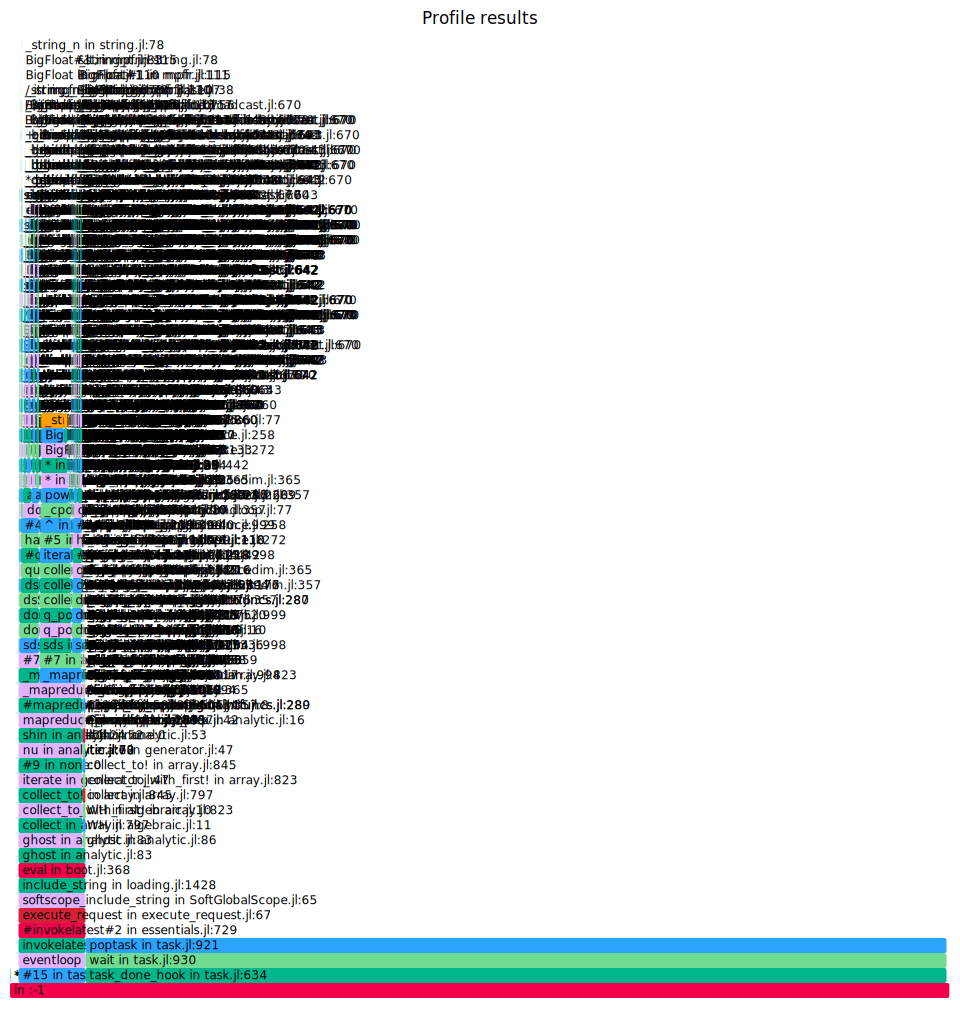

In [17]:
k=5
@profview G = ghost(A[k],d[k],β[k])
ProfileSVG.view(maxdepth=64, timeunit=:ms)

3.1415926535897932384626433832793

In [20]:
k=11
@time G = ghost(A[k],d[k],β[k])

  4.602724 seconds (65.95 M allocations: 2.530 GiB, 4.47% gc time)


11×11 Matrix{Complex{BigFloat}}:
   -0.018681+0.0im         …   0.00585298+0.0608195im
  0.00585298-0.0608195im        -0.199843+3.31519e-31im
    0.031463+0.0191918im         0.052625-0.108447im
  -0.0574877+0.092124im          0.317939+0.158299im
   0.0139827-0.0639243im        -0.212499-0.0254951im
    0.117583+0.00916394im  …  -0.00700543-0.385687im
   -0.050433-0.0378537im        -0.107439+0.176054im
  -0.0139765-0.011408im         -0.032762+0.0490775im
   0.0228931-0.00988323im      -0.0393495-0.0714364im
   0.0121304+0.00127559im     0.000352338-0.0398924im
 -0.00967047+0.0311545im   …     0.104459+0.021723im

In [18]:
k=11
@time G = ghost(A[k],d[k],β[k])

  4.480305 seconds (60.13 M allocations: 2.303 GiB, 4.19% gc time)


11×11 Matrix{Complex{BigFloat}}:
   -0.018681+0.0im         …   0.00585298+0.0608195im
  0.00585298-0.0608195im        -0.199843+3.31519e-31im
    0.031463+0.0191918im         0.052625-0.108447im
  -0.0574877+0.092124im          0.317939+0.158299im
   0.0139827-0.0639243im        -0.212499-0.0254951im
    0.117583+0.00916394im  …  -0.00700543-0.385687im
   -0.050433-0.0378537im        -0.107439+0.176054im
  -0.0139765-0.011408im         -0.032762+0.0490775im
   0.0228931-0.00988323im      -0.0393495-0.0714364im
   0.0121304+0.00127559im     0.000352338-0.0398924im
 -0.00967047+0.0311545im   …     0.104459+0.021723im

In [100]:
norm(G*G-G)

2×2 Matrix{ZZRingElem}:
 3106  -2145
 585   -404

2×2 Matrix{ZZRingElem}:
 3106  -2145
 585   -404

In [35]:
RR.(ugos)

3-element Vector{RealFieldElem}:
 [0.3460143392358258839 +/- 7.29e-20]
 1.0000000000000000000
 [2.890053638263963812 +/- 6.59e-19]

In [6]:
RR = RealField()
R, x = PolynomialRing(RR, "x")

xs = arb[inv(RR(i)) for i=1:5]
f = from_roots(R, xs)

LoadError: MethodError: [0mCannot `convert` an object of type [92mRealFieldElem[39m[0m to an object of type [91marb[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T at Base.jl:61

In [30]:
u = ugos[1]
v = ugos[3]

2.8900536382639638124570092961031295999999999999999999999999989

In [23]:
Integer <: Int

false

In [39]:
guess(QQBar, RR("1.41421356 +/- 1e-6"), 2)

6-element Vector{RealFieldElem}:
 [0.3460143392358258839 +/- 7.29e-20]
 1.0000000000000000000
 [2.890053638263963812 +/- 6.59e-19]
 [-0.3460143392358258839 +/- 7.29e-20]
 -1.0000000000000000000
 [-2.890053638263963812 +/- 6.59e-19]

In [43]:
?coefficients_of_univariate

search: coefficients_of_univariate



```
coefficients_of_univariate(p::MPolyRingElem)
```

Return the coefficients of p, which is assumed to be univariate, as an array in ascending order.


In [46]:
c = coefficients(from_roots( R, vcat(RR.(ugos),RR.(-ugos)) ))

PolyCoeffs{RealPoly}(x^6 + [+/- 1.58e-18]*x^5 + [-9.4721359549995794 +/- 1.83e-17]*x^4 + [+/- 1.68e-17]*x^3 + [9.4721359549995794 +/- 2.59e-17]*x^2 + [+/- 4.05e-18]*x + [-1.00000000000000000 +/- 5.78e-19])

In [180]:
?ghost

search: ghost gethostname CPS_height_bounds gcd_with_cofactors



ghost((A,d,β,q=[0, 0])

Ghost.


In [202]:
norm(G*G-G)

1.0396655057624173687995285712797919657481562365728230048318841e-52

In [206]:
1.3454915028125262879488532914097 * 0.12599537015174743098776733999906

0.16952569993289518

In [205]:
k = 1
G = ghost(A[k],d[k],β[k]);

(0.12599537015174743098776733999906, 1.3454915028125262879488532914097, 2.6180339887498948482045868343642, 1.0)
(0.14551548805556859557388347711168, 1.2864745084375788638465598742261, 2.6180339887498948482045868343674, 1.0)
(0.076075445040438710235062355158805, 1.5139320225002103035908263312716, 2.6180339887498948482045868343642, 1.0)
(0.029525181569641661098014113560851, 1.6909830056250525758977065828179, 2.6180339887498948482045868343642, 1.0)
(0.060077472777692099765313605113811, 1.5729490168751577276931197484521, 2.6180339887498948482045868343674, 1.0)
(0.25064766970898235452322869781832, 1.0278640450004206071816526625432, 2.6180339887498948482045868343642, 1.0)
(0.2464798914331754285890024502283, 1.0364745084375788638465598742261, 2.6180339887498948482045868343642, 1.0)
(-0.012549680895297021670181435489763, 1.859423525312736591539679622675, 2.6180339887498948482045868343674, 1.0)
(0.068447367694959100328807213257795, 1.5417960675006309107724789938084, 2.61803398874989484820458683

In [61]:
k = 1
χ0 = [ nu(A[k],d[k],[0,p],β[k]) for p=0:d[k]-1];
χ1 = [ nu(A[k],d[k],[1,p],β[k]) for p=0:d[k]-1];

In [63]:
k=2
allnu = [ nu(A[k],d[k],[p1,p2],β[k]) for p1=0:d[k]-1, p2=0:d[k]-1];
allnu

5×5 Matrix{BigFloat}:
 1.0        0.805281   0.521796   0.31941    0.206967
 0.206967  -0.196562   0.173439  -0.196562   0.805281
 0.31941    0.173439   0.173439   0.521796  -0.84791
 0.521796  -0.196562   0.31941    0.960955   0.960955
 0.805281   0.206967  -0.84791    0.960955  -0.84791

In [80]:
function matsym( M, G, n)
    @assert size(G) == (2,2)
    a, c, b, d = G
    s, t = size(M)
    [ M[mod(a*j+b*k,n)+1,mod(c*j+d*k,n)+1] for j=0:s-1, k=0:t-1]
end

matsym (generic function with 1 method)

In [92]:
matsym( allnu, [-1 -1; 1 0], d[2] ) - allnu

5×5 Matrix{BigFloat}:
  0.0          -1.78068e-43   3.02799e-44   1.92474e-44   1.09092e-44
  8.96501e-45  -7.85499e-45   5.56093e-45  -3.3801e-45   -2.28219e-45
  5.45976e-45   4.3783e-46   -5.99876e-45  -1.40172e-44  -4.21121e-44
 -1.62626e-44   1.12351e-44  -2.47072e-44   2.02486e-44   2.57027e-44
  1.8035e-43   -1.98743e-44  -1.0584e-44   -4.59513e-44   5.26962e-44

In [178]:
k=1
allnu = [ nu(A[k],d[k],[p1,p2],β[k]) for p1=0:d[k]-1, p2=0:d[k]-1];
allnu

4×4 Matrix{BigFloat}:
  1.0       -0.76027    0.447214  -0.263064
 -0.263064  -0.263064  -0.263064  -0.76027
  0.447214  -0.263064   0.447214   0.76027
 -0.76027   -0.263064   0.76027   -0.76027

In [179]:
[0 1 2 3; 3 3 3 1; 2 3 2 4; 1 3 4 1]

4×4 Matrix{Int64}:
 0  1  2  3
 3  3  3  1
 2  3  2  4
 1  3  4  1

In [177]:
matsym( allnu, [-1 -1; 1 0], d[k] )[1:2,:] - allnu[1:2,:]

2×8 Matrix{BigFloat}:
 0.0       1.34014e-43  -1.67175e-43  …   1.32648e-44   2.41873e-44
 0.655616  0.655616     -0.410361        -0.655616     -1.11456

In [167]:
k = 6
aaa = [(j,k) for j=0:d[k]-1, k=0:d[k]-1][1:2,:]

2×8 Matrix{Tuple{Int64, Int64}}:
 (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)  (0, 7)
 (1, 0)  (1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (1, 7)

In [168]:
bbb = matsym( [(j,k) for j=0:d[k]-1, k=0:d[k]-1], [-1 -1; 1 0], d[k] )[1:2,:]

2×8 Matrix{Tuple{Int64, Int64}}:
 (0, 0)  (7, 0)  (6, 0)  (5, 0)  (4, 0)  (3, 0)  (2, 0)  (1, 0)
 (7, 1)  (6, 1)  (5, 1)  (4, 1)  (3, 1)  (2, 1)  (1, 1)  (0, 1)

In [169]:
ccc = matsym( [(j,k) for j=0:d[k]-1, k=0:d[k]-1], [0 1; -1 -1], d[k] )[1:2,:]

2×8 Matrix{Tuple{Int64, Int64}}:
 (0, 0)  (1, 7)  (2, 6)  (3, 5)  (4, 4)  (5, 3)  (6, 2)  (7, 1)
 (0, 7)  (1, 6)  (2, 5)  (3, 4)  (4, 3)  (5, 2)  (6, 1)  (7, 0)

In [171]:
aaa ∪ bbb ∪ ccc

37-element Vector{Tuple{Int64, Int64}}:
 (0, 0)
 (1, 0)
 (0, 1)
 (1, 1)
 (0, 2)
 (1, 2)
 (0, 3)
 (1, 3)
 (0, 4)
 (1, 4)
 (0, 5)
 (1, 5)
 (0, 6)
 ⋮
 (3, 0)
 (2, 1)
 (2, 0)
 (2, 6)
 (2, 5)
 (3, 5)
 (3, 4)
 (4, 4)
 (4, 3)
 (5, 3)
 (5, 2)
 (6, 2)

In [ ]:
([1 0; 0 1]*[1 -1; 0 1]*[0 -1; 1 0])

2×2 Matrix{Int64}:
 -1  -1
  1   0

In [108]:
[0 -1; 1 0]*[1 -1; 1 0]*[0 -1; 1 0]

2×2 Matrix{Int64}:
  0   1
 -1  -1

In [119]:
A[k]

2×2 Matrix{ZZRingElem}:
 56  -15
 15  -4

In [139]:
QA = ZZ.(-qmat(QuadBin(A[k][2,1],A[k][2,2]-A[k][1,1],-A[k][1,2])).//(d[k]*(d[k]-2)))

2×2 Matrix{ZZRingElem}:
 -1  2
 2   -1

In [151]:
k=4
ad = ZZ.( [-A[k][2,1],A[k][1,1]-A[k][2,2],A[k][1,2]].//(d[k]*(d[k]-2)) )
QA = QuadBin(ad...)

Binary quadratic form with equation
-4*x^2 + 8*x*y - 2*y^2

In [152]:
q[k]

Binary quadratic form with equation
2*x^2 - 4*x*y + y^2

In [153]:
discriminant(QA)

32

In [154]:
discriminant(q[k])

8

In [155]:
stabilizer(QA)

2×2 Matrix{ZZRingElem}:
 -1  2
 -4  7

In [156]:
L[k]

2×2 Matrix{ZZRingElem}:
 7  -2
 4  -1

In [157]:
A[k]

2×2 Matrix{ZZRingElem}:
 239  -70
 140  -41

In [138]:
A[5]

2×2 Matrix{ZZRingElem}:
 204  -35
 35   -6

In [53]:
K, a = quadratic_field(5)

(Real quadratic field defined by x^2 - 5, sqrt(5))

In [56]:
guess(QQBar, c[2], 2)

LoadError: MethodError: no method matching guess(::CalciumQQBarField, ::RealFieldElem, ::Int64)
[0mClosest candidates are:
[0m  guess(::CalciumQQBarField, [91m::acb[39m, ::Int64) at ~/.julia/packages/Nemo/jFzAs/src/calcium/qqbar.jl:1236
[0m  guess(::CalciumQQBarField, [91m::acb[39m, ::Int64, [91m::Int64[39m) at ~/.julia/packages/Nemo/jFzAs/src/calcium/qqbar.jl:1236
[0m  guess(::CalciumQQBarField, [91m::arb[39m, ::Int64) at ~/.julia/packages/Nemo/jFzAs/src/calcium/qqbar.jl:1271
[0m  ...

### data tables

Now define some functions for working with SICs.
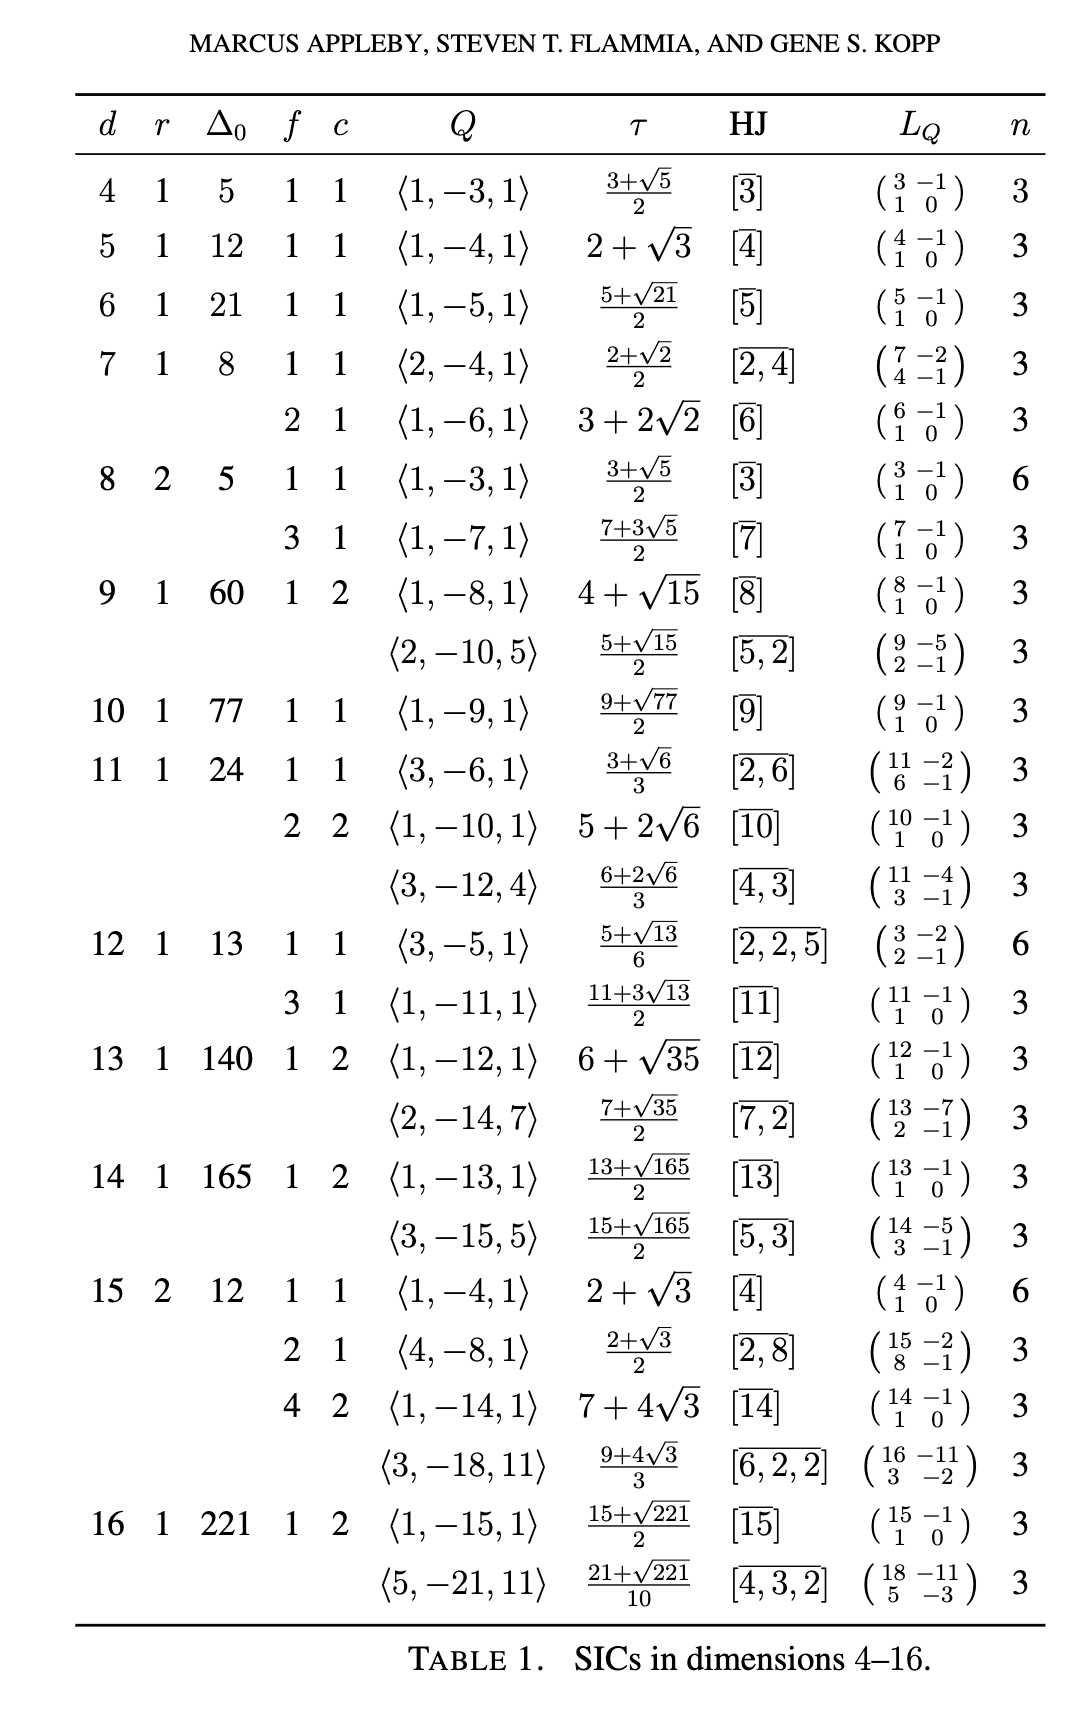


### Scratch

In [458]:
?sl2zo

search: flipsign FlintPuiseuxSeriesRing FlintPuiseuxSeriesRingElem



```
flipsign(x, y)
```

Return `x` with its sign flipped if `y` is negative. For example `abs(x) = flipsign(x,x)`.

# Examples

```jldoctest
julia> flipsign(5, 3)
5

julia> flipsign(5, -3)
-5
```


In [13]:
q = map(x->QuadBin(x...),
      [[1 -3 1], [1 -4 1], [1 -5 1], [2 -4 1], [1 -6 1], [1 -3 1], [1 -7 1], [1 -8 1], [2 -10 5], 
      [1 -9 1], [3 -6 1], [1 -10 1], [3 -12 4], [3 -5 1], [1 -11 1], [1 -12 1], [2 -14 7], [1 -13 1], 
      [3 -15 5], [1 -4 1], [4 -8 1], [1 -14 1], [3 -18 11], [1 -15 1], [5 -21 11]])
    d = [4; 5; 6; 7; 7; 8; 8; 9; 9; 10; 11; 11; 11; 12; 12; 13; 13; 14; 14; 15; 15; 15; 15; 16; 16] 
    L = stabilizer.(q)
    n = sl2zorder.(L,d)
    A = L.^n
    Δ = discriminant.(q)

25-element Vector{ZZRingElem}:
 5
 12
 21
 8
 32
 5
 45
 60
 60
 77
 24
 96
 96
 13
 117
 140
 140
 165
 165
 12
 48
 192
 192
 221
 221

In [18]:
q = map(x->QuadBin(x...),
  [[1 -3 1], [1 -4 1], [1 -5 1], [2 -4 1], [1 -6 1], [1 -3 1], [1 -7 1], [1 -8 1], [2 -10 5], 
  [1 -9 1], [3 -6 1], [1 -10 1], [3 -12 4], [3 -5 1], [1 -11 1], [1 -12 1], [2 -14 7], [1 -13 1], 
  [3 -15 5], [1 -4 1], [4 -8 1], [1 -14 1], [3 -18 11], [1 -15 1], [5 -21 11]])
d = [4; 5; 6; 7; 7; 8; 8; 9; 9; 10; 11; 11; 11; 12; 12; 13; 13; 14; 14; 15; 15; 15; 15; 16; 16] 
L = stabilizer.(q)
n = sl2zorder.(L,d)
A = L.^n
β = map(x->(-BigFloat(x.b)+sqrt(BigFloat(discriminant(x))))/(2x.a),q)

25-element Vector{BigFloat}:
  2.6180339887498948482045868343656381177203091798057628621354484
  3.7320508075688772935274463415058723669428052538103806280558075
  4.7912878474779200032940235968640042444922282883839859513036217
  1.7071067811865475244008443621048490392848359376884740365883392
  5.8284271247461900976033774484193961571393437507538961463533568
  2.6180339887498948482045868343656381177203091798057628621354484
  6.8541019662496845446137605030969143531609275394172885864063451
  7.8729833462074168851792653997823996108329217052915908265875743
  4.4364916731037084425896326998911998054164608526457954132937871
  8.8874821936960610302031941537081547804379384137772517954638468
  1.8164965809277260327324280249019637973219824935522233761442302
  9.8989794855663561963945681494117827839318949613133402568653839
  3.6329931618554520654648560498039275946439649871044467522884605
  1.4342585459106648821865368779117493243752160956408743687850769
 10.9083269131959839396788319012057439193769448

In [17]:
setprecision(200)

200

In [463]:
for k=1:10
    @time G = Zauner.ghost(A[k],d[k],β[k])
    println("‖G²-G‖₂ = ",norm(G*G-G))
    # println("‖G²-G‖₂ ≤ 1e-19? ",norm(G*G-G) <= 1e-19)
end

  0.721591 seconds (6.71 M allocations: 275.279 MiB, 8.09% gc time, 44.97% compilation time: 100% of which was recompilation)
‖G²-G‖₂ = 1.1928243375014799036311672004792e-24
  0.428638 seconds (4.09 M allocations: 154.268 MiB, 5.85% gc time)
‖G²-G‖₂ = 1.4647780156438788963323839306517e-24
  0.671343 seconds (7.00 M allocations: 267.817 MiB, 7.20% gc time)
‖G²-G‖₂ = 2.0498316724741055051594200770962e-24
  1.731019 seconds (16.58 M allocations: 626.691 MiB, 6.81% gc time)
‖G²-G‖₂ = 3.2704151954892305247720836822505e-24
  1.065309 seconds (12.92 M allocations: 502.418 MiB, 6.86% gc time)
‖G²-G‖₂ = 1.9035515176886064772102001588689e-24
  2.337800 seconds (24.71 M allocations: 945.777 MiB, 7.36% gc time)
‖G²-G‖₂ = 3.3717005472401840012073293100404e-24
  1.580244 seconds (23.60 M allocations: 934.376 MiB, 10.54% gc time)
‖G²-G‖₂ = 2.0023039466049839064898164377749e-23
  2.509542 seconds (44.18 M allocations: 1.733 GiB, 12.13% gc time)
‖G²-G‖₂ = 4.4328135192035786541677444799105e-23
  3.32717

In [530]:
for k=1:10
    @time G = Zauner.ghost(A[k],d[k],β[k])
    println("‖G²-G‖₂ = ",norm(G*G-G))
    # println("‖G²-G‖₂ ≤ 1e-19? ",norm(G*G-G) <= 1e-19)
end

  1.490607 seconds (3.83 M allocations: 163.856 MiB, 3.13% gc time, 86.17% compilation time: 100% of which was recompilation)
‖G²-G‖₂ = 9.6059574215351160725359997646974e-26
  0.380379 seconds (3.65 M allocations: 137.816 MiB, 9.43% gc time)
‖G²-G‖₂ = 1.4717598995845864311546039810465e-25
  0.596524 seconds (6.22 M allocations: 237.884 MiB, 10.08% gc time)
‖G²-G‖₂ = 5.2087567469210022240303462446818e-25
  1.503383 seconds (14.95 M allocations: 565.560 MiB, 6.78% gc time)
‖G²-G‖₂ = 3.00007012951679160187896873695e-25
  0.893875 seconds (11.42 M allocations: 445.199 MiB, 8.78% gc time)
‖G²-G‖₂ = 1.3869313510827257463372891417138e-24
  2.015878 seconds (22.39 M allocations: 858.683 MiB, 7.77% gc time)
‖G²-G‖₂ = 7.2129033398733564930058633840579e-25
  1.342181 seconds (21.65 M allocations: 860.184 MiB, 9.69% gc time)
‖G²-G‖₂ = 1.8551819438721901553786513683617e-23
  2.268556 seconds (41.75 M allocations: 1.643 GiB, 14.79% gc time)
‖G²-G‖₂ = 4.5954840060345050323137464146821e-23
  3.013279 

In [540]:
for k=1:10
    @time G = Zauner.ghost(A[k],d[k],β[k])
    println("‖G²-G‖₂ = ",norm(G*G-G))
    # println("‖G²-G‖₂ ≤ 1e-19? ",norm(G*G-G) <= 1e-19)
end

  1.400019 seconds (3.47 M allocations: 145.880 MiB, 2.77% gc time, 85.63% compilation time: 100% of which was recompilation)
‖G²-G‖₂ = 9.6059574215351160725359997646974e-26
  0.392050 seconds (3.65 M allocations: 137.802 MiB, 10.39% gc time)
‖G²-G‖₂ = 1.4717598995845864311546039810465e-25
  0.596001 seconds (6.22 M allocations: 237.865 MiB, 9.66% gc time)
‖G²-G‖₂ = 5.2087567469210022240303462446818e-25
  1.487600 seconds (14.95 M allocations: 565.504 MiB, 5.35% gc time)
‖G²-G‖₂ = 3.00007012951679160187896873695e-25
  0.894975 seconds (11.41 M allocations: 445.171 MiB, 9.50% gc time)
‖G²-G‖₂ = 1.3869313510827257463372891417138e-24
  2.044938 seconds (22.39 M allocations: 858.610 MiB, 7.67% gc time)
‖G²-G‖₂ = 7.2129033398733564930058633840579e-25
  1.418525 seconds (21.65 M allocations: 860.149 MiB, 11.82% gc time)
‖G²-G‖₂ = 1.8551819438721901553786513683617e-23
  2.311115 seconds (41.75 M allocations: 1.643 GiB, 14.22% gc time)
‖G²-G‖₂ = 4.5954840060345050323137464146821e-23
  3.064711

In [542]:
for k=1:10
    @time G = Zauner.ghost(A[k],d[k],β[k])
    println("‖G²-G‖₂ = ",norm(G*G-G))
    # println("‖G²-G‖₂ ≤ 1e-19? ",norm(G*G-G) <= 1e-19)
end

  4.007238 seconds (114.12 M allocations: 4.673 GiB, 20.99% gc time, 7.71% compilation time: 100% of which was recompilation)
‖G²-G‖₂ = 1.9883619803536379496466947059624e-25
  0.341422 seconds (3.35 M allocations: 126.532 MiB, 7.25% gc time)
‖G²-G‖₂ = 2.0895908507249476947457547717947e-25
  0.545577 seconds (5.82 M allocations: 223.398 MiB, 9.62% gc time)
‖G²-G‖₂ = 6.1012312486505946945270348896119e-25
  1.380762 seconds (13.85 M allocations: 525.161 MiB, 5.45% gc time)
‖G²-G‖₂ = 4.6563768404047726134968956417249e-25
  0.850042 seconds (10.99 M allocations: 429.430 MiB, 9.54% gc time)
‖G²-G‖₂ = 1.3435279039417523109062542362123e-24
  1.923273 seconds (21.07 M allocations: 810.018 MiB, 8.32% gc time)
‖G²-G‖₂ = 8.6020180662815293509455606662653e-25
  1.552062 seconds (21.11 M allocations: 840.171 MiB, 10.60% gc time)
‖G²-G‖₂ = 1.8720182242053557432916267070647e-23
  2.342297 seconds (41.13 M allocations: 1.620 GiB, 15.18% gc time)
‖G²-G‖₂ = 4.5713299620673789782049581207669e-23
  3.04354

In [567]:
setprecision(100,base=10)

100

In [19]:
k=1
gos = [ Zauner.nu(A[k],d[k],[p1,p2],β[k]) for p1=0:d[k]-1, p2=0:d[k]-1]

4×4 Matrix{BigFloat}:
  1.0       -0.76027    0.447214  -0.263064
 -0.263064  -0.263064  -0.263064  -0.76027
  0.447214  -0.263064   0.447214   0.76027
 -0.76027   -0.263064   0.76027   -0.76027

In [634]:
using Nemo

In [635]:
Nemo.RealField(64)

LoadError: MethodError: no method matching RealField(::Int64)
[0mClosest candidates are:
[0m  RealField() at ~/.julia/packages/Nemo/jFzAs/src/arb/ArbTypes.jl:98

In [629]:
RR = RealField(64)
R, x = PolynomialRing(RR, "x")

xs = arb[inv(RR(i)) for i=1:5]
f = from_roots(R, xs)

LoadError: MethodError: no method matching RealField(::Int64)
[0mClosest candidates are:
[0m  RealField() at ~/.julia/packages/Nemo/jFzAs/src/arb/ArbTypes.jl:98

In [627]:
using Nemo

In [577]:
setprecision(100,base=10)

100

In [24]:
ugos = (d[k]+1)*unique(round.(gos.^2,digits=35))[2:end]

3-element Vector{BigFloat}:
 0.34601433923582588395216437262814664999999999999999999999999994
 1.0
 2.8900536382639638124570092961031295999999999999999999999999989

In [576]:
ugos*sqrt(BigFloat(5))

5-element Vector{BigFloat}:
  2.236067977499789696409173668731276235440618359611525724270897245409
 -0.5882298353839474232080975192630349023812489386785041634308954166444
  1.0
 -1.70001577588678976719219361505817340376336456867257828658619687875
  1.70001577588678976719219361505817340376336456867257828658619687875

In [491]:
W = BigFloat[0.34549150281252628794885329140895,0.28647450843757886384655987422605,0.51393202250021030359082633127158,0.69098300562505257589770658281789,0.5729490168751577276931197484521,0.027864045000420607181652662543153,0.036474508437578863846559874226052,0.859423525312736591539679622675,0.54179606750063091077247899380842,0.71352549156242113615344012577395,0.48606797749978969640917366873473,0.74467844093694795307408088042079,0.059016994374947424102293417183684,0.77254248593736856025573354296079,0.25861046343715825666490721169237,0.40450849718747371205114670859263,0.059016994374947424102293417185261,0.77254248593736856025573354296394,0.75,0.34549150281252628794885329140974,0.28647450843757886384655987422921,0.4270509831248422723068802515479,0.97213595499957939281834733746947,0.48935688187389590614816176084158,0.77254248593736856025573354295763,0.25861046343715825666490721169868,0.0032889043741062097389880921194663,0.11803398874989484820458683436737,0.54508497187473712051146708592157,0.51722092687431651332981442338473,0.46352549156242113615344012577553,0.83155948031231598435802696014447,0.031152949374526816920640754649997,0.140576474687263408460320377325,0.45820393249936908922752100621683,0.23403532281084385922224264128761,0.48606797749978969640917366873473,0.74467844093694795307408088044603,0.7479673453110541628130689725655,0.83155948031231598435802696014763,0.031152949374526816920640754662619,0.26189936781126446640389530384339,0.17705098312484227230688025155421,0.31762745781210568076720062889183,0.77583139031147476999472163509603]

45-element Vector{BigFloat}:
 0.34549150281252627436856528220233
 0.2864745084375788786168470778648
 0.51393202250021030597082472013426
 0.69098300562505254873713056440465
 0.57294901687515775723369415572961
 0.027864045000420608472202488314906
 0.036474508437578864739059270050348
 0.85942352531273658033939000233659
 0.54179606750063091791247416040278
 0.71352549156242117689430415339302
 0.48606797749978969402917527986574
 0.7446784409369479051932216862042
 0.059016994374947423507293819966435
 ⋮
 0.14057647468726341966060999766341
 0.45820393249936908208752583959722
 0.23403532281084385435754313675716
 0.48606797749978969402917527986574
 0.7446784409369479051932216862042
 0.7479673453110541325727922412625
 0.83155948031231596839774056206807
 0.031152949374526818504538283605143
 0.26189936781126449405476819265459
 0.1770509831248422705218814598993
 0.31762745781210566242691584193381
 0.77583139031147474451444168153103

In [578]:
k=1
G = Zauner.ghost(A[k],d[k],β[k])

4×4 Matrix{Complex{BigFloat}}:
     0.10597+0.0im         …   -0.15366-0.115136im
    -0.15366+0.115136im        0.347908-6.24108e-101im
 1.64848e-77-0.255834im       -0.277962+0.370969im
   -0.102173-0.00916584im      0.138197+0.124301im

In [588]:
gos

4×4 Matrix{BigFloat}:
  1.0       -0.76027    0.447214  -0.263064
 -0.263064  -0.263064  -0.263064  -0.76027
  0.447214  -0.263064   0.447214   0.76027
 -0.76027   -0.263064   0.76027   -0.76027

In [472]:
w = BigFloat(0.34549150281252628794885329140895); b1 = β[1]; b2 = BigFloat(1.0);

In [500]:
@time begin
    for k=1:length(W)
        Zauner.dsIntQGK(W[k],b1,b2,21)
    end
end

  0.271614 seconds (1.93 M allocations: 72.344 MiB, 10.66% gc time)


In [501]:
begin
    pts = 1000
    # compute the nodes and weights for the [0,1] piece
    @time t0, w0 = Zauner.legendre(BigFloat, pts)
    # compute the nodes and weights for the [1,∞) piece
    @time t1, w1 = Zauner.laguerre(pts, BigFloat(0))
    
    @time begin 
        for k=1:length(W)
            Zauner.dsIntGQ2(W[k],b1,b2,t0,w0,t1,w1)
        end
    end
end



    


  3.263915 seconds (80.77 M allocations: 3.249 GiB, 18.83% gc time)
  2.885369 seconds (76.77 M allocations: 3.088 GiB, 19.56% gc time)
  0.702705 seconds (5.82 M allocations: 222.119 MiB, 7.45% gc time)


In [ ]:
@time a1 = Zauner.quadgk( t-> Zauner._g0(w,b1,b2,t),BigFloat(0),BigFloat(1), order=21)
println(a1)

@time begin
    t0, w0 = Zauner.legendre(BigFloat, 100)
    a2 = BigFloat(1)/2 * w0' * Zauner._g0.(w,b1,b2,(t0.+1)./2)
    a2 - a1[1] 
end

In [489]:
@time a1 = Zauner.quadgk( t-> exp(-t).*Zauner._g(w,b1,b2,t),BigFloat(0),BigFloat(Inf), order=21)
println(a1)

@time t1, w1 = Zauner.laguerre(1000, BigFloat(0))
@time a2 = w1' * Zauner._g(w,b1,b2,t1)
a2 - a1[1]

  0.338777 seconds (430.38 k allocations: 21.273 MiB, 98.70% compilation time)
(0.97874965524482919791833280157168, 8.910053929813314900925319051895e-18)
  2.973167 seconds (76.77 M allocations: 3.088 GiB, 19.40% gc time)
  0.007477 seconds (68.17 k allocations: 2.577 MiB)


3.6647322212947324432207262228777e-26

In [518]:
quadratic_field(20)

(Real quadratic field defined by x^2 - 20, sqrt(20))

In [526]:
@time [ [d,Zauner.sicnum.(d)] for d=4:200 ]

  8.724901 seconds (60.08 M allocations: 3.061 GiB, 26.47% gc time, 2.03% compilation time)


197-element Vector{Vector{ZZRingElem}}:
 [4, 1]
 [5, 1]
 [6, 1]
 [7, 2]
 [8, 2]
 [9, 2]
 [10, 1]
 [11, 3]
 [12, 2]
 [13, 2]
 [14, 2]
 [15, 4]
 [16, 2]
 ⋮
 [189, 16]
 [190, 6]
 [191, 46]
 [192, 16]
 [193, 12]
 [194, 12]
 [195, 36]
 [196, 16]
 [197, 20]
 [198, 12]
 [199, 27]
 [200, 10]

In [316]:
A = [3 -1; 7 -2]

2×2 Matrix{Int64}:
 3  -1
 7  -2

In [223]:
[A[2,2] -A[1,2]; -A[2,1] A[1,1]]

2×2 Matrix{Int64}:
 1  0
 0  1

In [205]:
A=L[1]*L[1]*L[1]
# A = ZZ.(A)

2×2 Matrix{Int64}:
 21  -8
  8  -3

In [224]:
(([A[2,2] -A[1,2]; -A[2,1] A[1,1]]*[1; 2])' * [0 -1;1 0] * [pi;1])[1,1]

-3.141592653589793

In [67]:
d = 4
D = (d+1)*(d-3)
Δ, f = coredisc(D)
K, a = quadratic_field(Δ)
ω = (D%4 + f*a)//2
# generate the quadratic order from the standard basis
Zω = Order([one(ω), ω])

Ug, fu = unit_group(Zω)
u = fu(Ug[2])
x, y = Int.(sign.(coordinates(one(u.parent.nf)*u))) # coordinates wrt K's basis, [1,a].
u = ( x*y > 0 ? x*u : x*norm(u)*u^(-1))
if norm(u) == -1 u=u^2 end
u

1//2*sqrt(5) + 3//2

In [185]:
newsl2test(M::Matrix) = is_sl2z(M)

newsl2test (generic function with 1 method)

In [186]:
L[1]

2×2 Matrix{Int64}:
 3  -1
 1   0

In [188]:
newsl2test(ZZ.(L[1]))

true

In [132]:
[quadclassunit((d+1)*(d-3)) for d=4:39]

36-element Vector{Tuple{ZZRingElem, Vector{ZZRingElem}, Vector{QuadBin{ZZRingElem}}, NfOrdElem, Vector{ZZRingElem}}}:
 (1, [1], [x^2 + x*y - y^2], 1//2*sqrt(5) + 3//2, [1, 1])
 (1, [1], [x^2 + 2*x*y - 2*y^2], 1//2*sqrt(12) + 2, [2, 1])
 (1, [1], [x^2 + 3*x*y - 3*y^2], 1//2*sqrt(21) + 5//2, [2, 1])
 (1, [1], [x^2 + 4*x*y - 4*y^2], sqrt(8) + 3, [3, 1])
 (1, [1], [x^2 + 5*x*y - 5*y^2], 3//2*sqrt(5) + 7//2, [3, 1])
 (2, [2], [2*x^2 + 6*x*y - 3*y^2], 1//2*sqrt(60) + 4, [4, 1])
 (1, [1], [x^2 + 7*x*y - 7*y^2], 1//2*sqrt(77) + 9//2, [4, 1])
 (2, [2], [5*x^2 + 4*x*y - 4*y^2], sqrt(24) + 5, [5, 1])
 (1, [1], [x^2 + 9*x*y - 9*y^2], 3//2*sqrt(13) + 11//2, [5, 1])
 (2, [2], [2*x^2 + 10*x*y - 5*y^2], 1//2*sqrt(140) + 6, [6, 1])
 (2, [2], [3*x^2 + 9*x*y - 7*y^2], 1//2*sqrt(165) + 13//2, [6, 1])
 (2, [2], [3*x^2 + 12*x*y - 4*y^2], 2*sqrt(12) + 7, [7, 1])
 (2, [2], [5*x^2 + 11*x*y - 5*y^2], 1//2*sqrt(221) + 15//2, [7, 1])
 ⋮
 (2, [2], [7*x^2 + 19*x*y - 13*y^2], 5//2*sqrt(29) + 27//2, [13, 1])
 (4, [2,

In [4]:
d = 4
Δ, f = coredisc((d+1)*(d-3))
f = sort(divisors(f))
# c, e, q, u = quadclassunit(Int(Δ))
# L = stabilizer(q[1],u)
# n = sl2zorder(L,d)
# A = L^n
# W = psl2word(A)
# (c,e,q[1],u,L,n,A,W)

1-element Vector{ZZRingElem}:
 1

In [ ]:
    for k in f
        c, e, q, u = quadclassunit(Int(k^2*Δ))
        # L = stabilizer(q[1],u)
        # n = sl2zorder(L,d)
        # A = L^n
        # W = psl2word(A)
    end
    (d,Δ,c,e,q[1],u,L,n,A,W)


In [290]:
# mutable struct GhostClass
#     d
#     Δ
#     f
    
# end

function GhostClass(d::Integer)
    Δ, f0 = coredisc((d+1)*(d-3))
    D = f0^2*Δ
    F = sort(divisors(f0))
    
    # quadratic field and generator
    K, a = quadratic_field(Δ)
    for f in F
        # generate the quadratic order from the standard basis
        ω = (D%4 + f*a)//2
        Zω = Order([one(a), ω])

        # compute the class group and generator map
        cl_gr, cl_map = picard_group(Zω)

        # the class number
        cl_num = order(cl_gr)

        # the generators, cycle decomposition, and quadratic form generators
        cl_gens = gens(cl_gr)
        cl_cyc = (cl_num == 1 ? [ZZ(1)] : diagonal(rels(cl_gr)) )
        cl_gens = (length(cl_gens) == 0 ? [quadbinid(D)] : [QuadBin(cl_map(g)) for g in cl_gens])
        cl_gens = reduction.(cl_gens)

        # compute the unit group and the expansion in the standard Z basis for Zω
        unit_gr, fund_unit = unit_group(Zω)
        u = fund_unit(unit_gr[2])
        x, y = Int.(sign.(coordinates(one(a)*u))) # coordinates wrt K's basis, [1,a].
        u = ( x*y > 0 ? x*u : x*norm(u)*u^(-1))
        if norm(u) == -1 u=u^2 end
        y = f*trace(a*u)//D
        x = (trace(u) - y*(D%4))//2
        # pgens = map(x->Int.([x.a,x.b,x.c]),cl_gens)

        println((d,Δ,f,cl_num,cl_cyc,cl_gens,u),".\n")

    end
end

GhostClass

In [318]:
g = GhostClass(1001)

(1001, 999996, 1, 108, ZZRingElem[2, 54], QuadBin{ZZRingElem}[6*x^2 + 990*x*y - 829*y^2, 5*x^2 + 996*x*y - 399*y^2], 1//2*sqrt(999996) + 500).



In [34]:
mutable struct Ghost(d,f)
    Δ::
    f::
    Δ, f = coredisc((d+1)*(d-3))
    f = sort(divisors(f))
    for k in f
        c, e, q, u = quadclassunit(Int(k^2*Δ))
        # L = stabilizer(q[1],u)
        # n = sl2zorder(L,d)
        # A = L^n
        # W = psl2word(A)
    end
    (d,Δ,c,e,q[1],u,L,n,A,W)
end


ghostdata (generic function with 2 methods)

In [ ]:
stabilizer(v[1][3][1],v[1][4])

2×2 Matrix{Int64}:
 1  1
 1  2

In [23]:
d = 98
println("d = ",d)
Δ, f = coredisc((d+1)*(d-3))
K, a = quadratic_field(Δ)
println((K,a))
f = Int.(sort(divisors(f)))
println("divisors = ", f)

# pick a divisor
fq = f[1]
ΔQ = fq^2*Δ

w = (ΔQ % 4 + fq*a)//2
ZQ = Order([one(a), w])
println(ZQ)

# compute the class group, cycle decomposition, and generators of Z+Z[ω]
cg, cm = picard_group(ZQ)
println(cg)
gcg = gens(cg)
gbcn = order(cg)
gbcyc = (gbcn == 1 ? [ZZ(1)] : diagonal(rels(cg)) )
gbgens = (length(gcg) == 0 ? [quadbinid(ΔQ)] : [QuadBin(cm(g)) for g in gcg])
gbgens = reduction.(gbgens)
qcu = (gbcn,gbcyc,gbgens);
println("quadclassunit = \n   ",qcu)

# compute a totally positive fundamental unit with norm 1.
Ug, fu = unit_group(ZQ)
u = fu(Ug[2])
x, y = Int.(sign.(coordinates(one(a)*u))) # coordinates wrt K's basis, [1,a].
u = ( x*y > 0 ? x*u : x*norm(u)*u^(-1))
if norm(u) == -1 u=u^2 end
println(" initial unit: u = ",u,"\n typeof(u) = ",typeof(u))


# Tower height of a unit u for dimension d.
h = towerh(u,d)
println("tower height = ",h)

y = fq*trace(a*u)//ΔQ
# x = (trace(u) - y*(ΔQ%4))//2
# println("u == x+y*w?  ",u == x+y*w)
println("ΔQ % 4 = ",ΔQ%4)
println("a I + b SQ \n(a,b) = ",(trace(u)//2,y))
println("coordinates(u) = ",coordinates(u))

Q = gbgens[1]
# Q=Q^2
println("Q = ",Q)


L = ZZ.(trace(u)//2 .* [1 0; 0 1] + y .* [0 -1; 1 0]*qmat(Q))
println("L = ",L)
# L'*qmat(Q)*L==qmat(Q)

n = sl2zorder(L,d)
A = L^n
println("A = ",A)
W = psl2word(A);
println("W = ",W)

d = 98
(Real quadratic field defined by x^2 - 1045, sqrt(1045))
divisors = [1, 3]
Order of Real quadratic field defined by x^2 - 1045
with Z-basis NfOrdElem[1, 1//2*sqrt(1045) + 1//2]
GrpAb: Z/4
quadclassunit = 
   (4, ZZRingElem[4], QuadBin{ZZRingElem}[3*x^2 + 31*x*y - 7*y^2])
 initial unit: u = 3//2*sqrt(1045) + 97//2
 typeof(u) = NfOrdElem
tower height = 1
ΔQ % 4 = 1
a I + b SQ 
(a,b) = (97//2, 3)
coordinates(u) = ZZRingElem[47, 3]
Q = 3*x^2 + 31*x*y - 7*y^2
L = ZZRingElem[2 21; 9 95]
A = ZZRingElem[18719 197568; 84672 893663]
W = ZZRingElem[1, 2, 2, 2, 3, 12, 2, 2, 2, 3, 12, 2, 2, 2, 3, 11]


### Real double sine function

In [125]:
using GaussQuadrature, QuadGK

In [24]:
Base.summarysize(laguerre(1000, BigFloat(0)))

208096

In [32]:
@time dsIntQGK(1,1,2,55) - 1/sqrt(BigFloat(2))

  9.755584 seconds (199.13 M allocations: 11.127 GiB, 14.31% gc time)


2.15291862416114910058748138029881086425557274400096958341897167227506588274081611196698713027677470182e-73

In [29]:
@time dsIntGQ(1,1,2,2000) - 1/sqrt(BigFloat(2))

 48.679701 seconds (837.60 M allocations: 46.674 GiB, 12.70% gc time)


-1.7970281173058410284983951931008348473993201718754881445866627954860319360578251525768228365947457862e-74

In [96]:
setprecision(200)
ds(1,1,2,50)-1/sqrt(BigFloat(2))

-1.815596169858562355186482799745363319585191359834606194995014e-44

In [350]:
a

sqrt(24)

### Plots

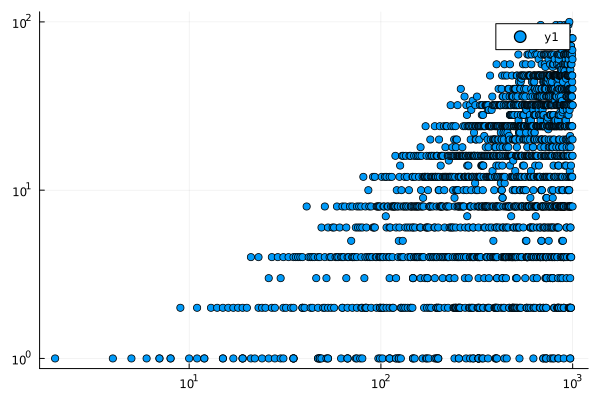

In [34]:
scatter(sicmul[1,:], sicmul[2,:], xaxis=:log, yaxis=:log)

In [16]:
dmax = 1000
sicnum = zeros(Int,dmax)
sicnum[1:3] .= 1
for d in 4:dmax
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        sicnum[d] += order(picard_group(OKf)[1])
        # println("f = ",f[j])
        # println(picard_group(OKf)[2])
    end
end
sicnum

1000-element Vector{Int64}:
   1
   1
   1
   1
   1
   1
   2
   2
   2
   1
   3
   2
   2
   ⋮
 120
  40
  84
  36
  80
  44
  84
  68
  32
  80
 144
  32

In [11]:
using Plots

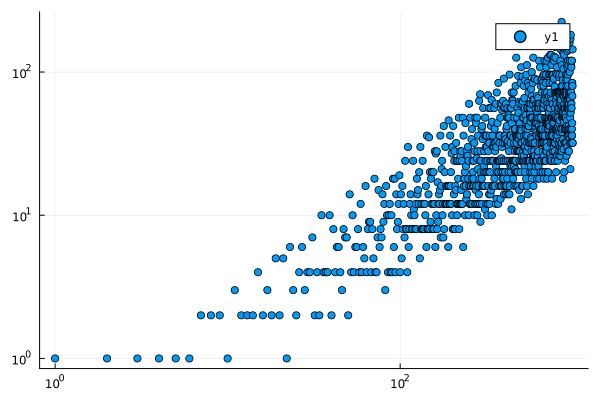

In [17]:
scatter(sicnum, xaxis=:log, yaxis=:log)

In [7]:
sicnum = [1,1,1]
for d in 4:45
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    println("\nd = $d, a = $a")
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        # println("f = ",f[j])
        println("f = $(f[j]), c(OKf) = ",order(picard_group(OKf)[1]))
        # println(picard_group(OKf)[2])
    end
end


d = 4, a = sqrt(5)
f = 1, c(OKf) = 1

d = 5, a = sqrt(12)
f = 1, c(OKf) = 1

d = 6, a = sqrt(21)
f = 1, c(OKf) = 1

d = 7, a = sqrt(8)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1

d = 8, a = sqrt(5)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 9, a = sqrt(60)
f = 1, c(OKf) = 2

d = 10, a = sqrt(77)
f = 1, c(OKf) = 1

d = 11, a = sqrt(24)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 2

d = 12, a = sqrt(13)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 13, a = sqrt(140)
f = 1, c(OKf) = 2

d = 14, a = sqrt(165)
f = 1, c(OKf) = 2

d = 15, a = sqrt(12)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 2

d = 16, a = sqrt(221)
f = 1, c(OKf) = 2

d = 17, a = sqrt(28)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 2

d = 18, a = sqrt(285)
f = 1, c(OKf) = 2

d = 19, a = sqrt(5)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 1
f = 8, c(OKf) = 2

d = 20, a = sqrt(357)
f = 1, c(OKf) = 2

d = 21, a = sqrt(44)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 4

d = 22, a = sqrt(437)
f = 1, c(OKf) = 1

d = 23, a = sqrt(120)
f = 1, c(OKf) = 2
f = 2

In [30]:
d = 48
K, a = quadratic_field((d+1)*(d-3))

(Real quadratic field defined by x^2 - 2205, sqrt(2205))

In [19]:
?zeta_log_residue#(OK,1e-5)

search: zeta_log_residue



```
zeta_log_residue(O::NfOrd, error::Float64) -> arb
```

Computes the residue of the zeta function of $\mathcal O$ at $1$. The output will be an element of type `arb` with radius less then `error`.


In [4]:
H = hilbert_class_field(K)

Class field defined mod (<1, 1>, InfPlc{AnticNumberField, Hecke.NumFieldEmbNfAbs}[]) of structure Abelian group with structure: Z/1